In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_time_vs_samples(d, s):
    df = pd.read_csv(f'../benchmark_results/time_vs_samples_{d}D_{s}MeansGrid.csv').iloc[1:]

    df['log2_signal_length'] = np.log2(df['signal_length'])
    df['log2_exec_time'] = np.log2(df['mean_exe_time_sec'])

    upper = np.log2(df['mean_exe_time_sec'] + 2*df['std_exe_time_sec']) - df['log2_exec_time']
    lower = df['log2_exec_time'] - np.log2(df['mean_exe_time_sec'] - 2*df['std_exe_time_sec'])
    yerr = np.vstack([lower, upper])

    plt.figure(figsize=(7, 7))
    plt.errorbar(df['log2_signal_length'], df['log2_exec_time'], yerr=yerr,
                 fmt='o-', capsize=4, markersize=4, label='mean ± 2σ (log2)')
    plt.xlabel('n samples')
    plt.ylabel('exe time (s)')

    xt = np.arange(np.floor(df['log2_signal_length'].min()), np.ceil(df['log2_signal_length'].max()) + 1, 1)
    yt = np.arange(np.floor((df['log2_exec_time'] - lower).min()), np.ceil((df['log2_exec_time'] + upper).max()) + 1, 1)
    plt.xticks(xt, [f'$2^{{{int(t)}}}$' for t in xt])
    plt.yticks(yt, [f'$2^{{{int(t)}}}$' for t in yt])

    plt.title(f'{d}D signals --- Size of Theta: {s**d}')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

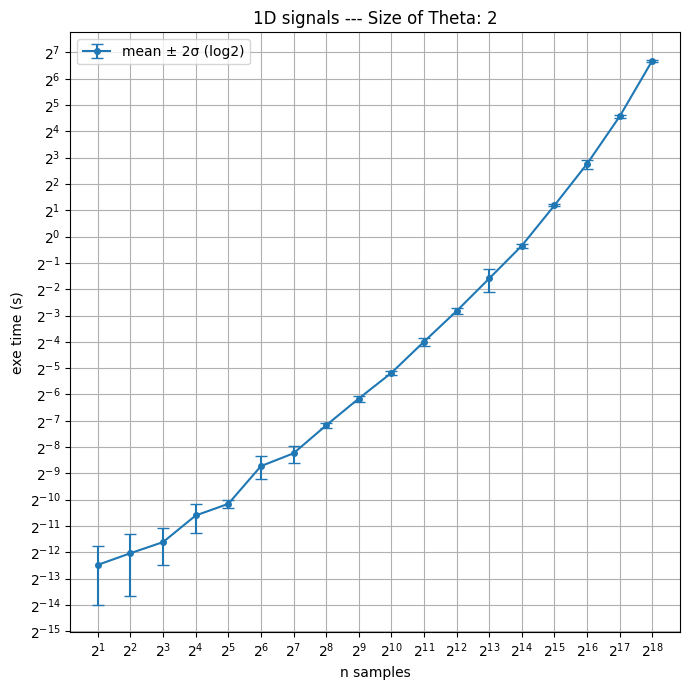

In [3]:
d = 1       # Dimensionality
s = 2       # Number of discrete value for each dimension
plot_time_vs_samples(d, s)

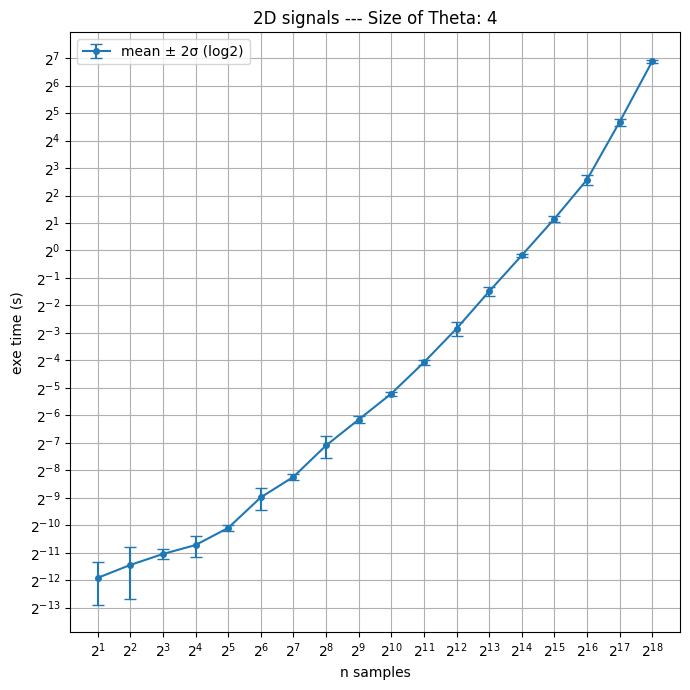

In [4]:
d = 2       # Dimensionality
s = 2       # Number of discrete value for each dimension
plot_time_vs_samples(d, s)